In [1]:
import numpy as np

from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators.emt import EMT

a = 3.5  # approximate lattice constant
b = a / 2
ni = Atoms('Ni',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential
cell = ni.get_cell()
traj = Trajectory('Ni.traj', 'w')
for x in np.linspace(0.90, 1.10,10):
    ni.set_cell(cell * x, scale_atoms=True)
    ni.get_potential_energy()
    traj.write(ni)

177.67253321169255 GPa


<AxesSubplot:title={'center':'sj: E: -0.014 eV, V: 10.588 Å$^3$, B: 177.673 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

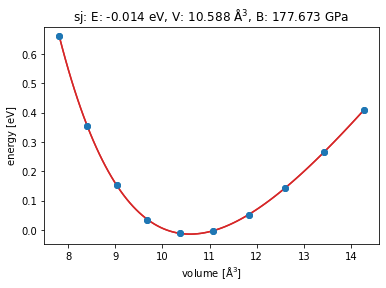

In [2]:
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState
configs = read('Ni.traj@0:10')  # read 5 configurations
# Extract volumes and energies:
volumes = [ni.get_volume() for ni in configs]
energies = [ni.get_potential_energy() for ni in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Ni-eos.pdf')
eos.plot('Ni-eos.png')